In [ ]:
!pip install tabulate

In [ ]:
!pip install keras-tuner

In [18]:
# importing libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras_tuner
from tabulate import tabulate

# reading sample data
df = pd.read_csv("./CarPrice.csv")
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
# understanding duplicates
duplicates = df.apply(lambda x: x.duplicated()).sum()
print (duplicates)

car_ID                0
symboling           199
CarName              58
fueltype            203
aspiration          203
doornumber          203
carbody             200
drivewheel          202
enginelocation      203
wheelbase           152
carlength           130
carwidth            161
carheight           156
curbweight           34
enginetype          198
cylindernumber      198
enginesize          161
fuelsystem          197
boreratio           167
stroke              168
compressionratio    173
horsepower          146
peakrpm             182
citympg             176
highwaympg          175
price                16
dtype: int64


Text(0.5, 1.0, 'Car Price Histogram')

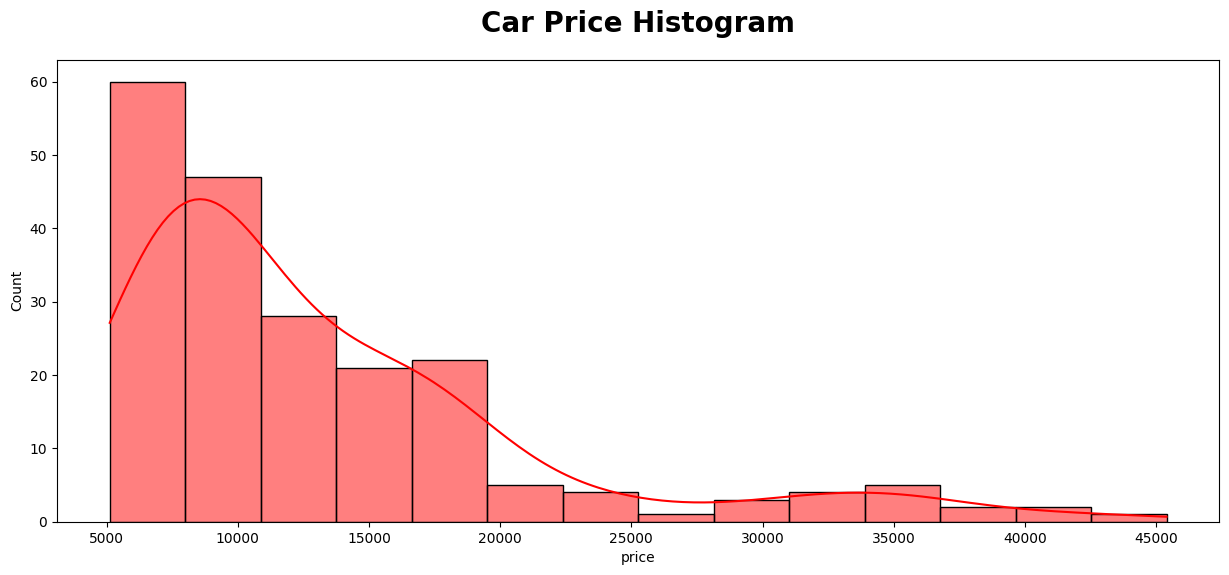

In [20]:
df.sample(10)
df = df.drop_duplicates()

plt.figure(figsize=(15,6))
sns.histplot(df["price"],color="red",kde=True)
plt.title("Car Price Histogram",fontweight="black",pad=20,fontsize=20)


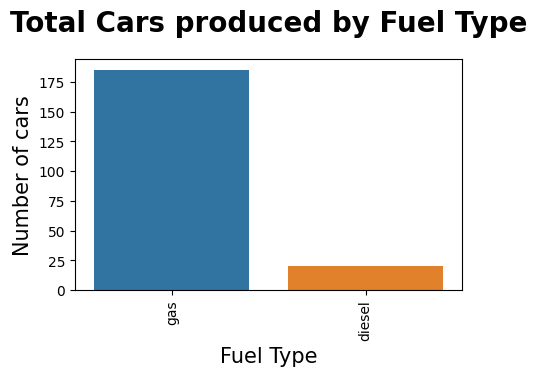

In [21]:
plt.figure(figsize=(5,3))
counts = df["fueltype"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Fuel Type",fontsize=15)
plt.ylabel("Number of cars",fontsize=15)
plt.title("Total Cars produced by Fuel Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

C:\Users\saifu\AppData\Local\Temp\ipykernel_16908\3000751648.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby_engineType = df.groupby(["enginetype"]).mean()


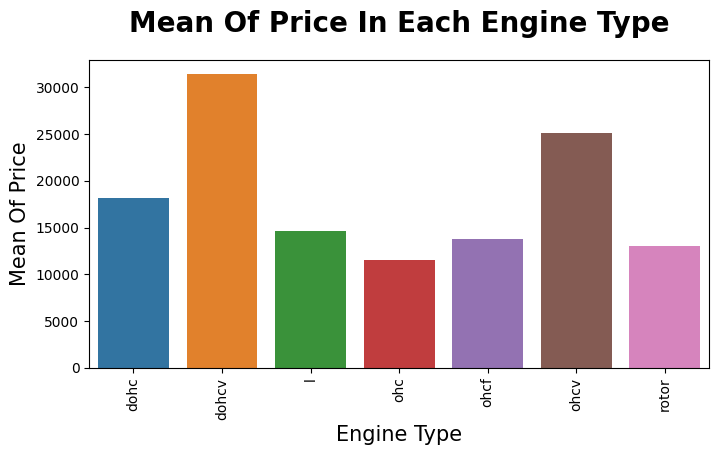

In [22]:
df_groupby_engineType = df.groupby(["enginetype"]).mean()
plt.figure(figsize=(8,4))
price_mean = df_groupby_engineType.price
sns.barplot(x=df_groupby_engineType.index, y=price_mean)
plt.xlabel("Engine Type",fontsize=15)
plt.ylabel("Mean Of Price",fontsize=15)
plt.title("Mean Of Price In Each Engine Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

C:\Users\saifu\AppData\Local\Temp\ipykernel_16908\238353647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


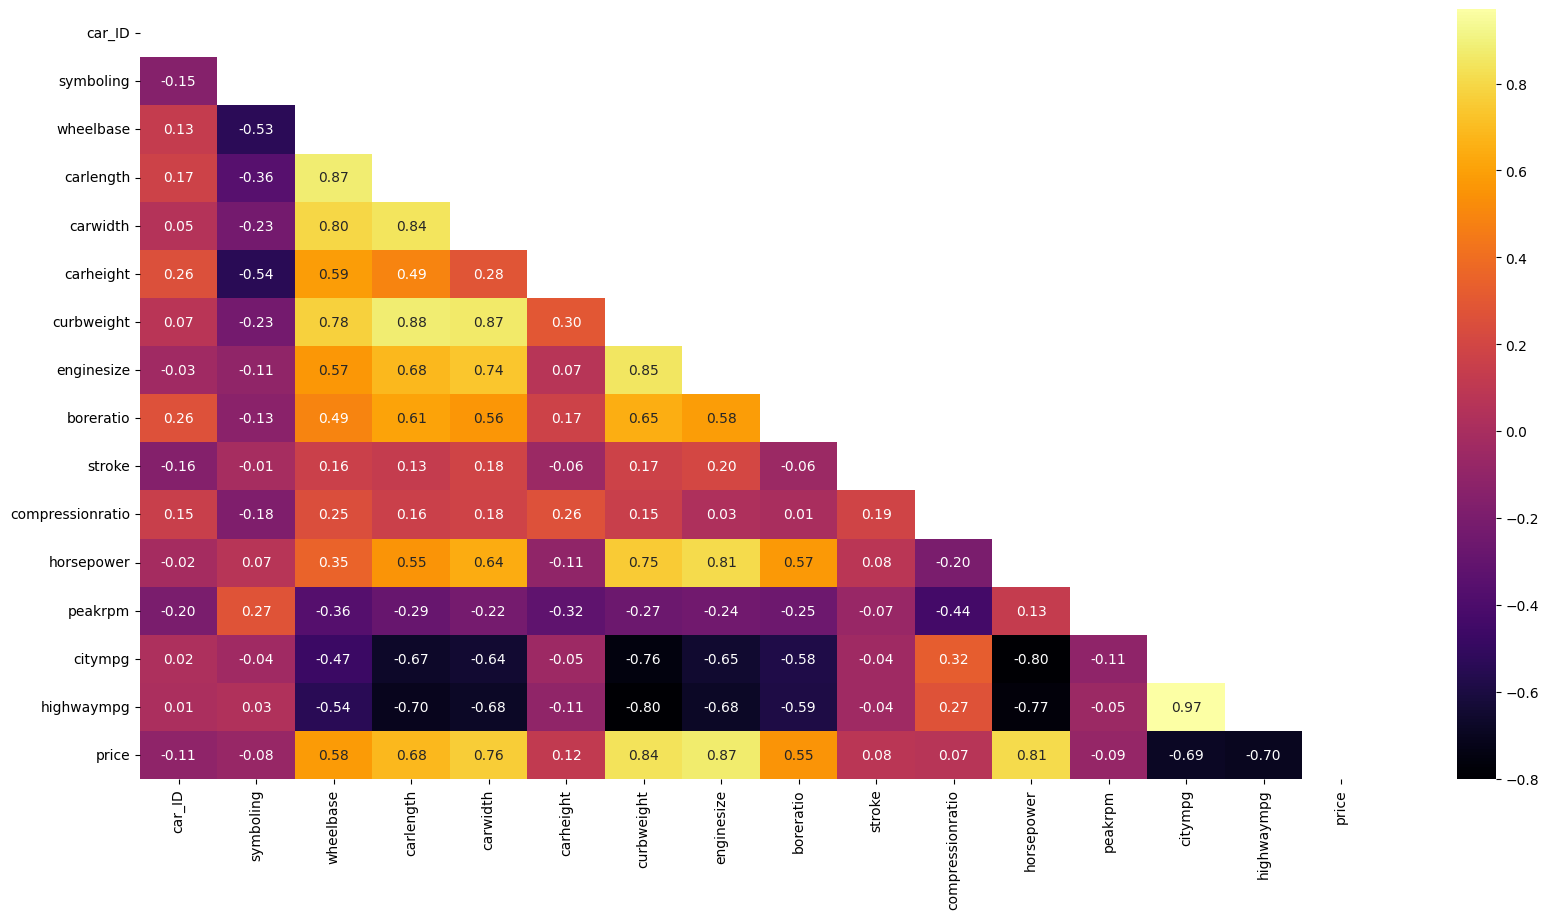

In [23]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno');

In [24]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
# Remove the low-effect Features
df = df.drop(["symboling","compressionratio","car_ID","stroke"],axis=1)

# adding a new column fuelsystem
df["fuelsystem"] =  df["fuelsystem"].replace(['mpfi', 'mfi'], "fi")
df["fuelsystem"] =  df["fuelsystem"].replace(['1bbl', '2bbl','4bbl'], "bbl")
df["fuelsystem"] =  df["fuelsystem"].replace(['spdi', 'idi','4bbl'], "spfi")

df.sample()

In [31]:
df.sample(10)
df.columns
df.dtypes

CarName            object
fueltype           object
aspiration         object
doornumber         object
carbody            object
drivewheel         object
enginelocation     object
wheelbase         float64
carlength         float64
carwidth          float64
carheight         float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
fuelsystem         object
boreratio         float64
horsepower          int64
peakrpm             int64
citympg             int64
highwaympg          int64
price             float64
dtype: object

In [32]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name) # adding columns to store company name
df.drop(columns=["CarName"],inplace=True)

In [33]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
df = df.merge(z.T,how="left",on="CompanyName")
bins = [0,10000,20000,40000]
cars_bin=['Low','Medium','High']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df = df.drop("CompanyName",axis=1)

df.dtypes

fueltype            object
aspiration          object
doornumber          object
carbody             object
drivewheel          object
enginelocation      object
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
fuelsystem          object
boreratio          float64
horsepower           int64
peakrpm              int64
citympg              int64
highwaympg           int64
price              float64
mean               float64
CarsRange         category
dtype: object

C:\Users\saifu\AppData\Local\Temp\ipykernel_16908\2324830124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.iloc[:,:-2].corr()


<Axes: >

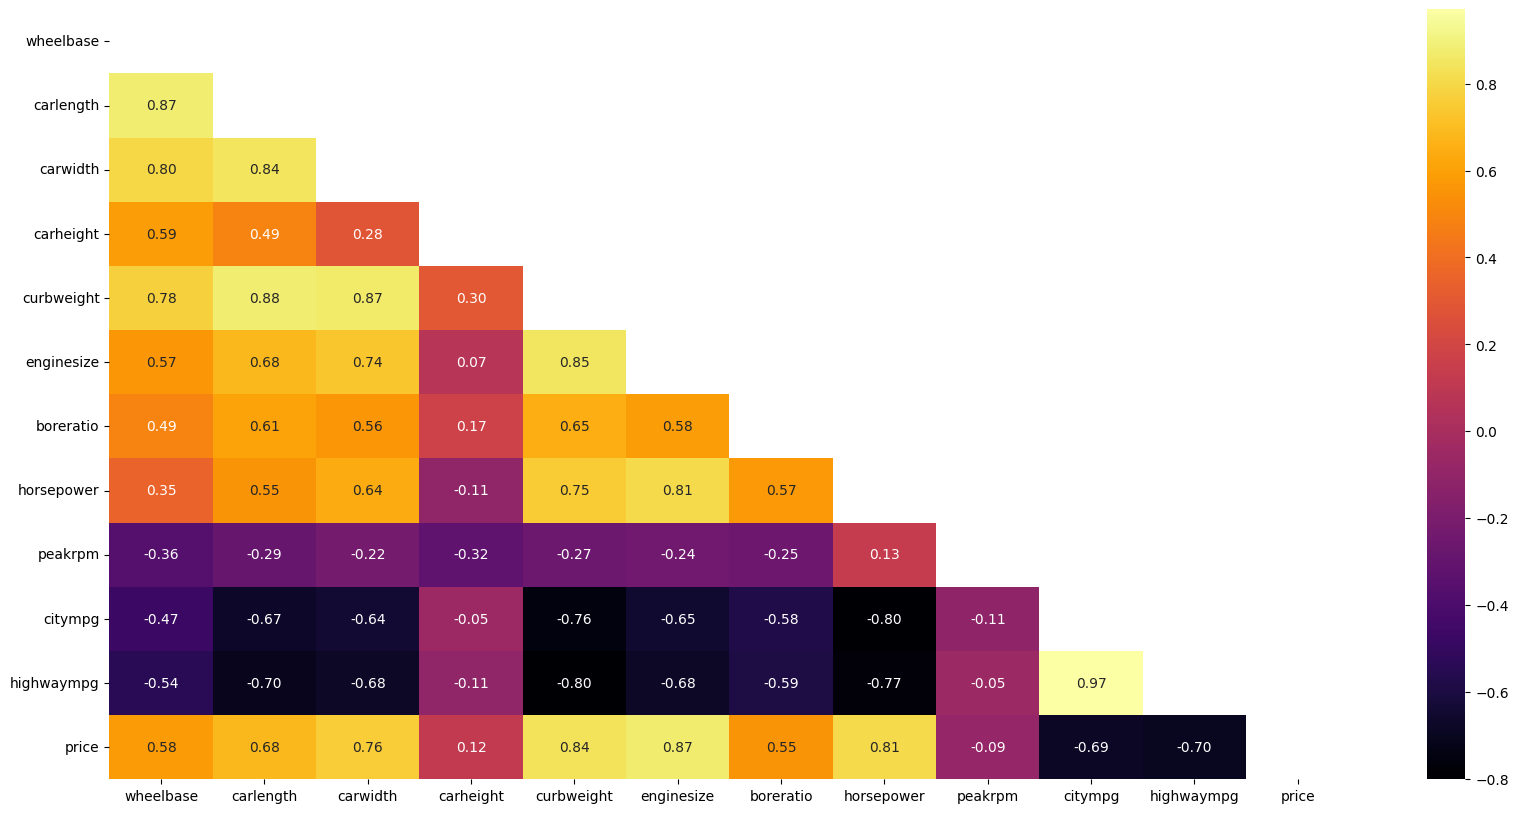

In [34]:
corr= df.iloc[:,:-2].corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno')

In [35]:
df["CarsRange"] = pd.Series(df["CarsRange"], dtype="object")
t = df.dtypes
for i in t[t=="object"].index:
    one_hot_encod = pd.get_dummies(df[i], prefix=i)#,drop_first=True
    df = pd.concat([df,one_hot_encod],axis=1)
    df.drop(i,axis=1,inplace=True)
Y = df["price"].copy()
df = df.drop(['price', "mean"],axis=1)

x_train,x_test , y_train,y_test = train_test_split(df,Y,test_size=0.08, shuffle=True)
x_train,x_val , y_train,y_val = train_test_split(x_train,y_train,test_size=0.1)

In [36]:
sc = MinMaxScaler()
x_train_s = sc.fit_transform(x_train)
x_val_s   = sc.transform(x_val)
x_test_s  = sc.transform(x_test)
x_train_s.shape

(169, 47)

## Part 1 : Design and Optimize by Keras Tuner
<ul>
    <li>Leaky ReLU</li>
    <li>Parametric ReLU</li>
    <li>ELU</li>
    <li>SELU</li>
</ul>

<b>Rectified Linear Unit (ReLU)</b> is an activation function in neural networks. It is a popular choice among developers and researchers because it tackles the vanishing gradient problem. A problem with ReLU is that it returns zero for any negative value input.

<b>SELU is a self-normalizing activation</b> function. It is a variant of the ELU . The main advantage of SELU is that we can be sure that the output will always be standardized due to its self-normalizing behavior. That means there is no need to include Batch-Normalization layers.

#### Normalization
Normalization is a data preparation technique that involves changing the values of numeric columns in a dataset to a common scale. This is usually used when the attributes of the dataset have different ranges.

There is 3 types of normalization:
<li>Input normalization: One example is scaling the pixel values of grey-scale photographs (0–255) to values between zero and one</li>
<li>Batch normalization: Values are changed between each layer of the network so that their mean is zero and their standard deviation is one.</li>
<li>Internal normalization: this is where SELU’s magic happens. The key idea is that each layer keeps the previous layer’s mean and variance.</li>

#### Advantages of SELU
<li>Like ReLU, SELU does not have vanishing gradient problem and hence, is used in deep neural networks.</li>
<li>Compared to ReLUs, SELUs cannot die.</li>
<li>SELUs learn faster and better than other activation functions without needing further procession. Moreover, other activation function combined with batch normalization cannot compete with SELUs.</li>

#### Disadvantages of SELU
<li>SELU is a relatively new activation function so it is not yet used widely in practice. ReLU stays as the preferred option.</li>
<li>More research on architectures such as CNNs and RNNs using SELUs is needed for wide-spread industry use.</li>

In [37]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=x_train_s.shape[-1]))

    for i in range(hp.Int("num_layers",min_value=2, max_value=5, step=1)):
        model.add(
            keras.layers.Dense(
                units=hp.Int(f"units{i}", min_value=64, max_value=512, step=64),
                activation=hp.Choice("activation", ["selu","relu"]),
                kernel_initializer="normal"
            )
        )
    model.add(keras.layers.Dense(1,kernel_initializer="normal"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=["mae",keras.metrics.RootMeanSquaredError()],
    )
    return model

In [38]:
tuner = keras_tuner.RandomSearch( build_model, objective='val_loss',max_trials=300, directory="./")
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'relu'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [39]:
tuner.search(x_train_s, y_train, epochs=20, validation_data=(x_val_s, y_val))

Trial 300 Complete [00h 00m 05s]
val_loss: 48332080.0

Best val_loss So Far: 3753796.75
Total elapsed time: 00h 27m 52s
INFO:tensorflow:Oracle triggered exit


In [40]:
models = tuner.get_best_models()
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               9216      
                                                                 
 dense_1 (Dense)             (None, 192)               37056     
                                                                 
 dense_2 (Dense)             (None, 384)               74112     
                                                                 
 dense_3 (Dense)             (None, 384)               147840    
                                                                 
 dense_4 (Dense)             (None, 512)               197120    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 465,857
Trainable params: 465,857
Non-trai

In [41]:
history=best_model.fit(x_train_s, y_train, epochs=100, validation_data=(x_val_s, y_val))

Epoch 1/100
6/6 [==============================] - 2s 49ms/step - loss: 4760242.5000 - mae: 1473.9093 - root_mean_squared_error: 2181.7981 - val_loss: 8367054.5000 - val_mae: 2206.1023 - val_root_mean_squared_error: 2892.5862
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 3601158.7500 - mae: 1350.2272 - root_mean_squared_error: 1897.6719 - val_loss: 4711511.5000 - val_mae: 1573.8917 - val_root_mean_squared_error: 2170.6016
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 3874893.2500 - mae: 1393.1656 - root_mean_squared_error: 1968.4749 - val_loss: 5953725.0000 - val_mae: 1838.8094 - val_root_mean_squared_error: 2440.0256
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 4317098.5000 - mae: 1480.7045 - root_mean_squared_error: 2077.7629 - val_loss: 3875851.0000 - val_mae: 1406.1805 - val_root_mean_squared_error: 1968.7181
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 3647087.0000 - mae: 1325

#### Drawing and evaluating the Loss function changes in each Epoch in order to prevent Over Fitting

Training MAE : 1656792.625
Validation MAE : 3061722.5


<Figure size 640x480 with 0 Axes>

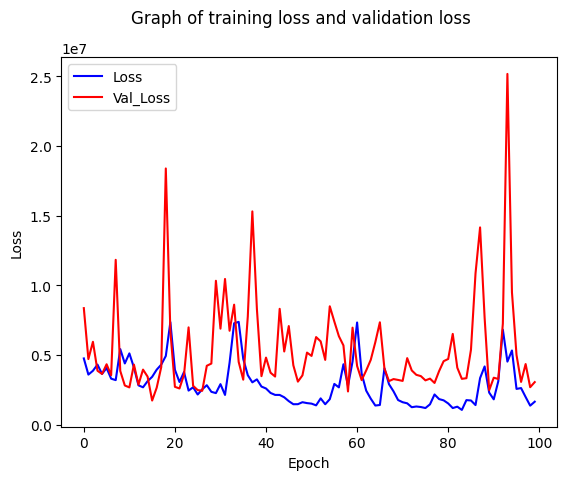

In [42]:
epochs = 100
print(f"Training MAE : {history.history['loss'][-1]}")
print(f"Validation MAE : {history.history['val_loss'][-1]}")
plt.clf()
fig = plt.figure()
fig.suptitle('Graph of training loss and validation loss')
plt.plot(range(epochs), history.history['loss'], color='b',label="Loss")
plt.plot(range(epochs), history.history['val_loss'], color='r',label="Val_Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#### Evaluating and Comparing Results

In [43]:
from sklearn.metrics import r2_score
pred=best_model.predict(x_test_s)
R2_NN=r2_score(y_true=y_test,y_pred=pred)

1/1 [==============================] - 0s 132ms/step


In [44]:
MAE_NN = best_model.evaluate(x_test_s,y_test,verbose=0)[1]
RMSE_NN = best_model.evaluate(x_test_s,y_test,verbose=0)[2]

#### Fit and Evaluate a Multi-Variable Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
lm = LinearRegression()
lm.fit(x_train_s,y_train)
y_predicted = lm.predict(x_test_s)
R2_Score_MLR = lm.score(x_test_s,y_test)
MAE_MLR = mean_absolute_error(y_test, y_predicted)
RMSE_MLR = sqrt(mean_squared_error(y_test, y_predicted))

#### Comparison of Neural Network Results versus Multi-Variable Regression

Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

In [47]:
print(
    tabulate(
        pd.DataFrame(
            data={
                "R2 Score":[R2_NN*100, R2_Score_MLR*100],
                "RMSE":[RMSE_NN, RMSE_MLR],
                "MAE":[MAE_NN, MAE_MLR]
            },
            index=["Neural Network","Multi-Variable Regression"]
        ), 
        headers="keys", 
        tablefmt='fancy_grid'
    )
)

╒═══════════════════════════╤════════════╤═════════╤═════════╕
│                           │   R2 Score │    RMSE │     MAE │
╞═══════════════════════════╪════════════╪═════════╪═════════╡
│ Neural Network            │    86.7414 │ 2128.82 │ 1644.24 │
├───────────────────────────┼────────────┼─────────┼─────────┤
│ Multi-Variable Regression │    92.6886 │ 1580.85 │ 1318.31 │
╘═══════════════════════════╧════════════╧═════════╧═════════╛
